# **Question 1** :::

1) **Write a program to generate a sinusoidal signal with the parameters mentioned below,**

**Amplitude 1,
 Frequency 5 Hz,
 Duration 1 and sampling frequency as *1000(1kHz)*.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

(a)**Plotting the continuous version of the sinusoidal signal** :


In [49]:
# Define signal parameters
amplitude = 1
frequency = 5  # in Hz
duration = 1  # in seconds
fs = 1000  # sampling frequency


In [50]:
# Generate time vector for continuous signal
t_continuous = np.linspace(0, duration, duration*fs, endpoint=False)

In [51]:
# Generate continuous sinusoidal signal
signal_continuous = amplitude * np.sin(2 * np.pi * frequency * t_continuous)

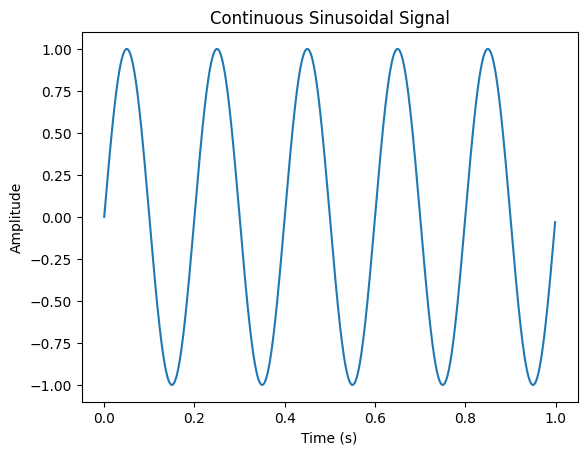

In [52]:
# Plot the continuous version of the sinusoidal signal
plt.figure()
plt.plot(t_continuous, signal_continuous)
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

(b) Sample the signal at a discrete sampling rate of 20 Hz, 40 Ilz, and 100
Hz and plot the discrete version of the signals.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Signal parameters
f0 = 5  # in Hz
duration = 1  # in seconds
t = np.linspace(0, duration, int(duration*1000), endpoint=False)  # Time vector of  continuous signal

In [54]:
# Generate continuous sinusoidal signal
signal_continuous = np.sin(2 * np.pi * f0 * t)

<ipython-input-58-17fe7a9cdc2b>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t, sampled_signal, use_line_collection=True)


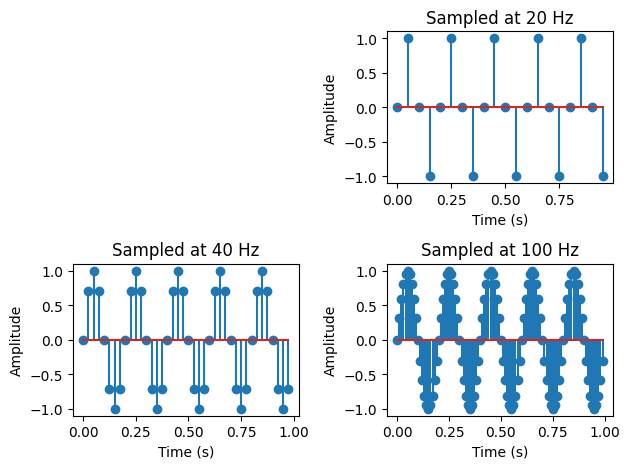

In [58]:
# Sample the signal at different discrete sampling rates
sampling_rates = [20, 40, 100]  # in Hz
for i, sr in enumerate(sampling_rates):
    n_samples = int(duration * sr)
    sampled_t = np.linspace(0, duration, n_samples, endpoint=False)
    sampled_signal = np.sin(2 * np.pi * f0 * sampled_t)

    plt.subplot(2, 2, i+2)
    plt.stem(sampled_t, sampled_signal, use_line_collection=True)
    plt.title(f'Sampled at {sr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

(c) Write an inference on how different sampling rates affect the representation of the sinusoidal signal.

**While considering different discrete sampling rates such as 20Hz, 40Hz, 100Hz as given :**

**Lower sampling rates may lead to an inaccurate representation of the signal, causing alias and loss of signal information due to undersampling.**

**Higher sampling rates allow for a more accurate representation of the original signal, capturing more details and preserving the signal's characteristics.**

# **2 nd Question** :::

**Generate a discrete-thne sinusoidal signal, x(n) = sin(2ff9n), where,
5011 z, Fs = 1000K z. Take a short frame of the signal containing 200 samples**

(a) Plot the original discrete-time sinusoidal signal over the 200 samples.

In [26]:
# Signal parameters
f0 = 5  # in Hz
Fs = 1000  # in Hz
n_samples = 200

In [27]:
# Time vector
n = np.arange(n_samples)
t = n / Fs

In [28]:
# Generate the discrete-time sinusoidal signal
signal = np.sin(2 * np.pi * f0 * n / Fs)

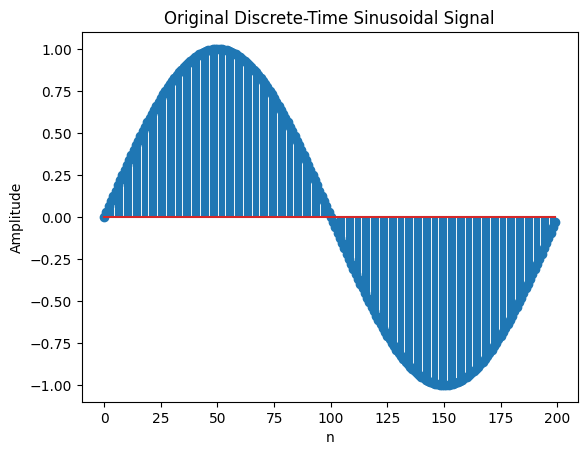

In [29]:
# Plot the original discrete-time sinusoidal signal
plt.figure()
plt.stem(n, signal)
plt.title('Original Discrete-Time Sinusoidal Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.show()


**(b) Write a program to compute the Discrete Time Fourier Transform (DTFT)
of this frame.**

In [30]:
# DTFT computation
omega = np.linspace(0, 2 * np.pi, n_samples, endpoint=False)
DTFT = np.sum(signal * np.exp(-1j * np.outer(omega, n)), axis=1)

Text(0, 0.5, 'Amplitude')

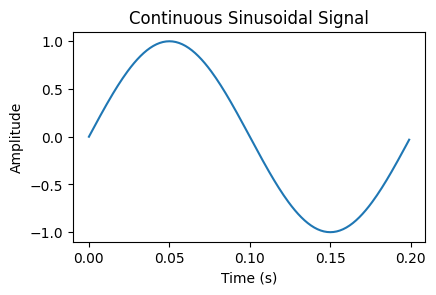

In [31]:
# Plot the continuous version of the sinusoidal signal
signal_continuous = np.sin(2 * np.pi * f0 * t)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(t, signal_continuous)
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


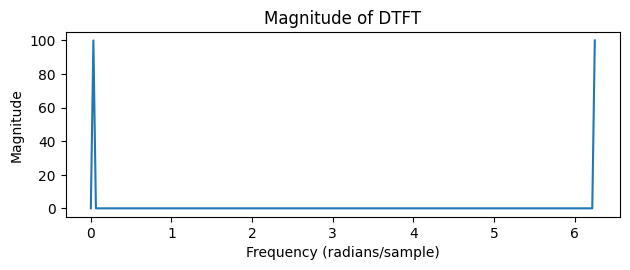

In [38]:
# Plot the magnitude of the DTFT
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(DTFT))
plt.title('Magnitude of DTFT')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

**(c) Write a program to cornpute the Discrete Fourier Transform (DFT) of
the same frame.**

In [36]:
# Compute the Discrete-Time Fourier Transform (DTFT) of the frame
omega = np.linspace(0, 2*np.pi, n_samples, endpoint=False)
DTFT = np.sum(signal * np.exp(-1j * np.outer(omega, n)), axis=1)

In [34]:
# Compute the Discrete Fourier Transform (DFT) of the frame using FFT
DFT = np.fft.fft(signal)

Text(0, 0.5, 'Magnitude')

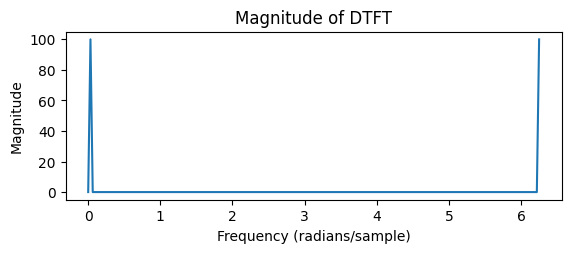

In [35]:
# Plot the magnitude of the DTFT and DFT
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(DTFT))
plt.title('Magnitude of DTFT')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')

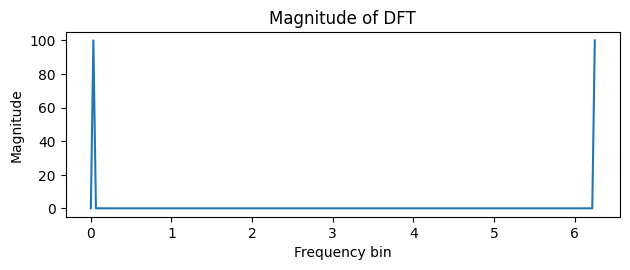

In [37]:
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, 2*np.pi, n_samples, endpoint=False), np.abs(DFT))
plt.title('Magnitude of DFT')
plt.xlabel('Frequency bin')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


(d) Comment any similaities or difFerences between DFT and DTFT.

**Similarities:**

*   Both DFT and DTFT provide the representation of the signal in the frequency domain
*   DFT and DTFT have complex values in their frequency domain representations, capturing both magnitude and phase information.

**Differences:**


*   The DFT is used for analyzing finite-length discrete signals,
  while the DTFT is used for infinite-length discrete-time signals.
*   The DFT operates on uniformly sampled finite-length sequences
while the DTFT operates on continuous-time signals or infinite-length sequences.




# **Question 3** :::

(3) Write a program to implement the source-filter model for speech synthesis

(a) Generate a discrete-tinw source signal, such as an itnpulse train, .r(n)
[l, 0, 0, l, 0, 0, 1) to represent the glottal pulse (voiced sound). Plot the
source signal, x(n).

In [39]:
# Generate the source signal (glottal pulse)
x = np.array([1, 0.0, 1, 0, 0.1])

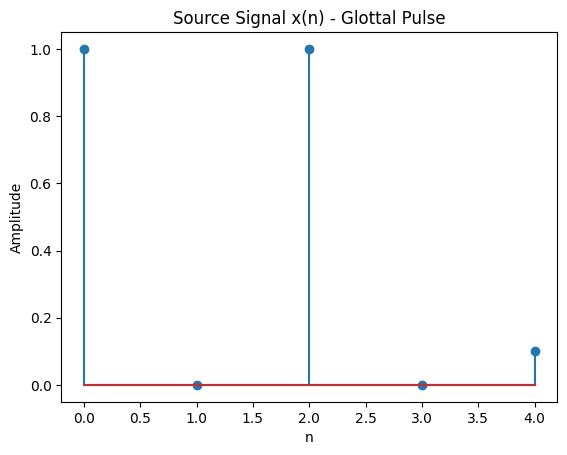

In [40]:
# Plot the source signal
plt.stem(x)
plt.title('Source Signal x(n) - Glottal Pulse')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.show()


(b) Define a vocal tract model using a sitnple irnpulse response (e.g., a set
of discrete coefficients representing formants or resonances of the vocal
tract). The vocal tract model is represented by the impulse response,[1, -0.5,0.25, -0.125,0.0625, -0.031251]. Plot the impulse re-
sponse, h(n).

In [43]:
h =np.array([1,-0.5,0.25,-0.125,0.0625,-0.03125])

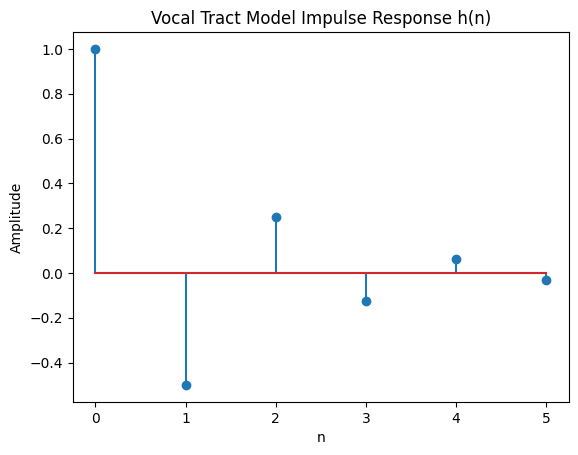

In [44]:
# Plot the vocal tract model impulse response
plt.stem(h)
plt.title('Vocal Tract Model Impulse Response h(n)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.show()


(c) Perform linear convolution between thc source signal, x(n) and the filter
impulse respomse, h(n) to generate the speech signal, y(n). Plot the
resulting convolved (speech) signal, y(n).

In [45]:
# Perform linear convolution between x and h to get the speech signal y
y = np.convolve(x, h, mode='full')


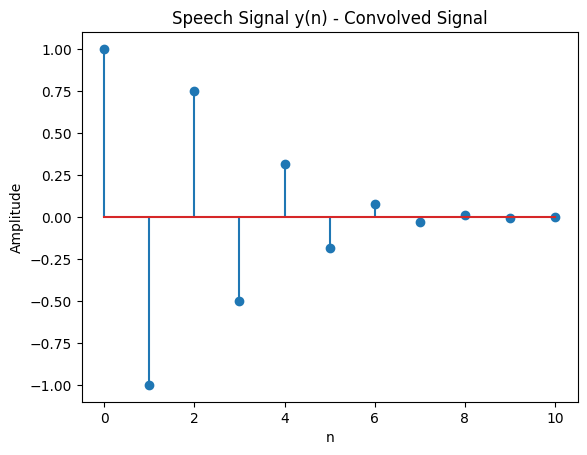

In [48]:
# Plot the resulting speech signal
plt.stem(y)
plt.title('Speech Signal y(n) - Convolved Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.show()


(d) Comment on how the filtering process shapes the source signal based on
the convolution result.

The filtering process shapes the source signal (glottal pulse) by changing its spectral content based on the characteristics of the vocal tract impulse response.

The convolution of the source signal with the filter response alters the signal's spectral, which simulates the resonances of the vocal tract and results in the generation of the speech signal.